# 知能システム開発特論

2312018014

芹澤龍生

## 課題

与えられたデータに対してEDAと分析をせよ

Data: StudentsPerformance.csv

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

/home/tatsuki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tatsuki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("../data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 欠損値確認

In [4]:
## 欠損値の数と割合を返す
def missing_columns(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
missing_columns(df)

,Total,Percent
writing score,0,0.0
reading score,0,0.0
math score,0,0.0
test preparation course,0,0.0
lunch,0,0.0
parental level of education,0,0.0
race/ethnicity,0,0.0
gender,0,0.0


### カテゴリ変数の変換

In [7]:
LE = LabelEncoder()

labels = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

for label in labels:
    df[label] = LE.fit_transform(df[label])

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


## EDA

In [9]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f2d651780>,
      dtype=object)

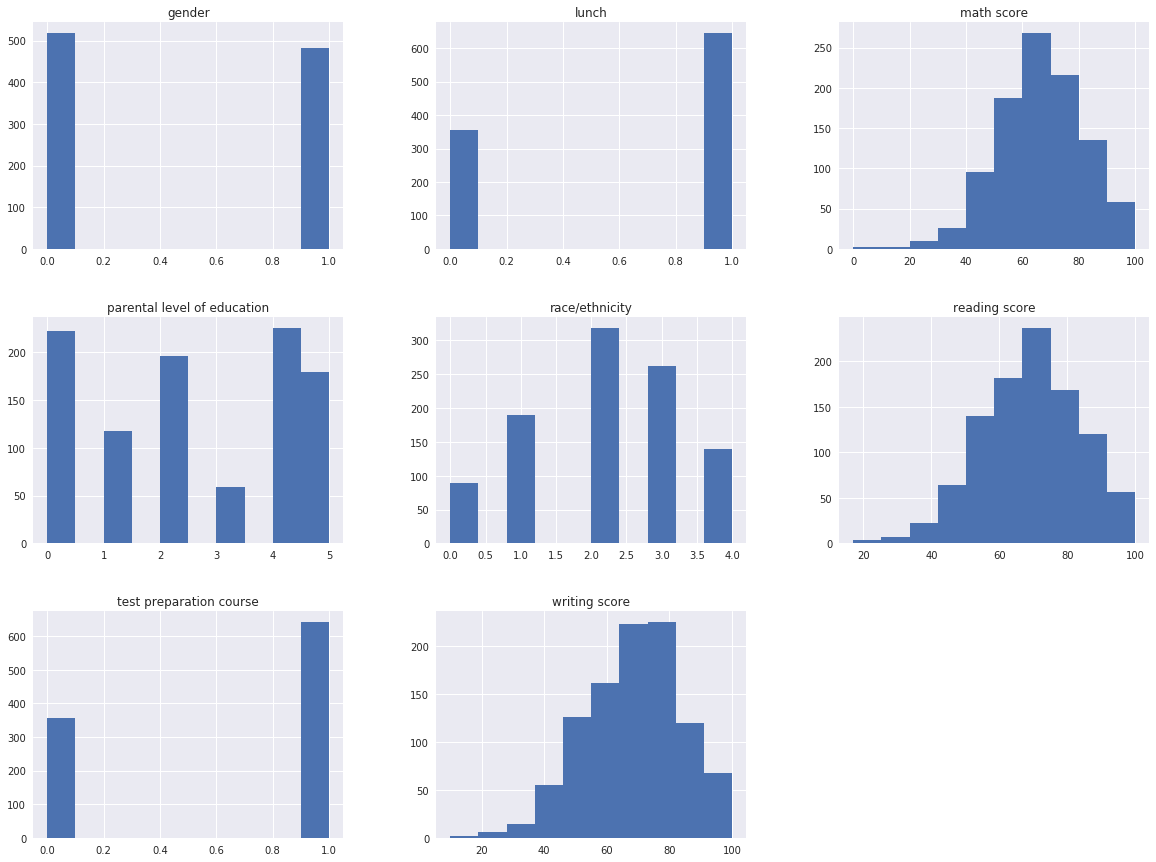

In [10]:
df.hist(bins=10, figsize=(20,15))

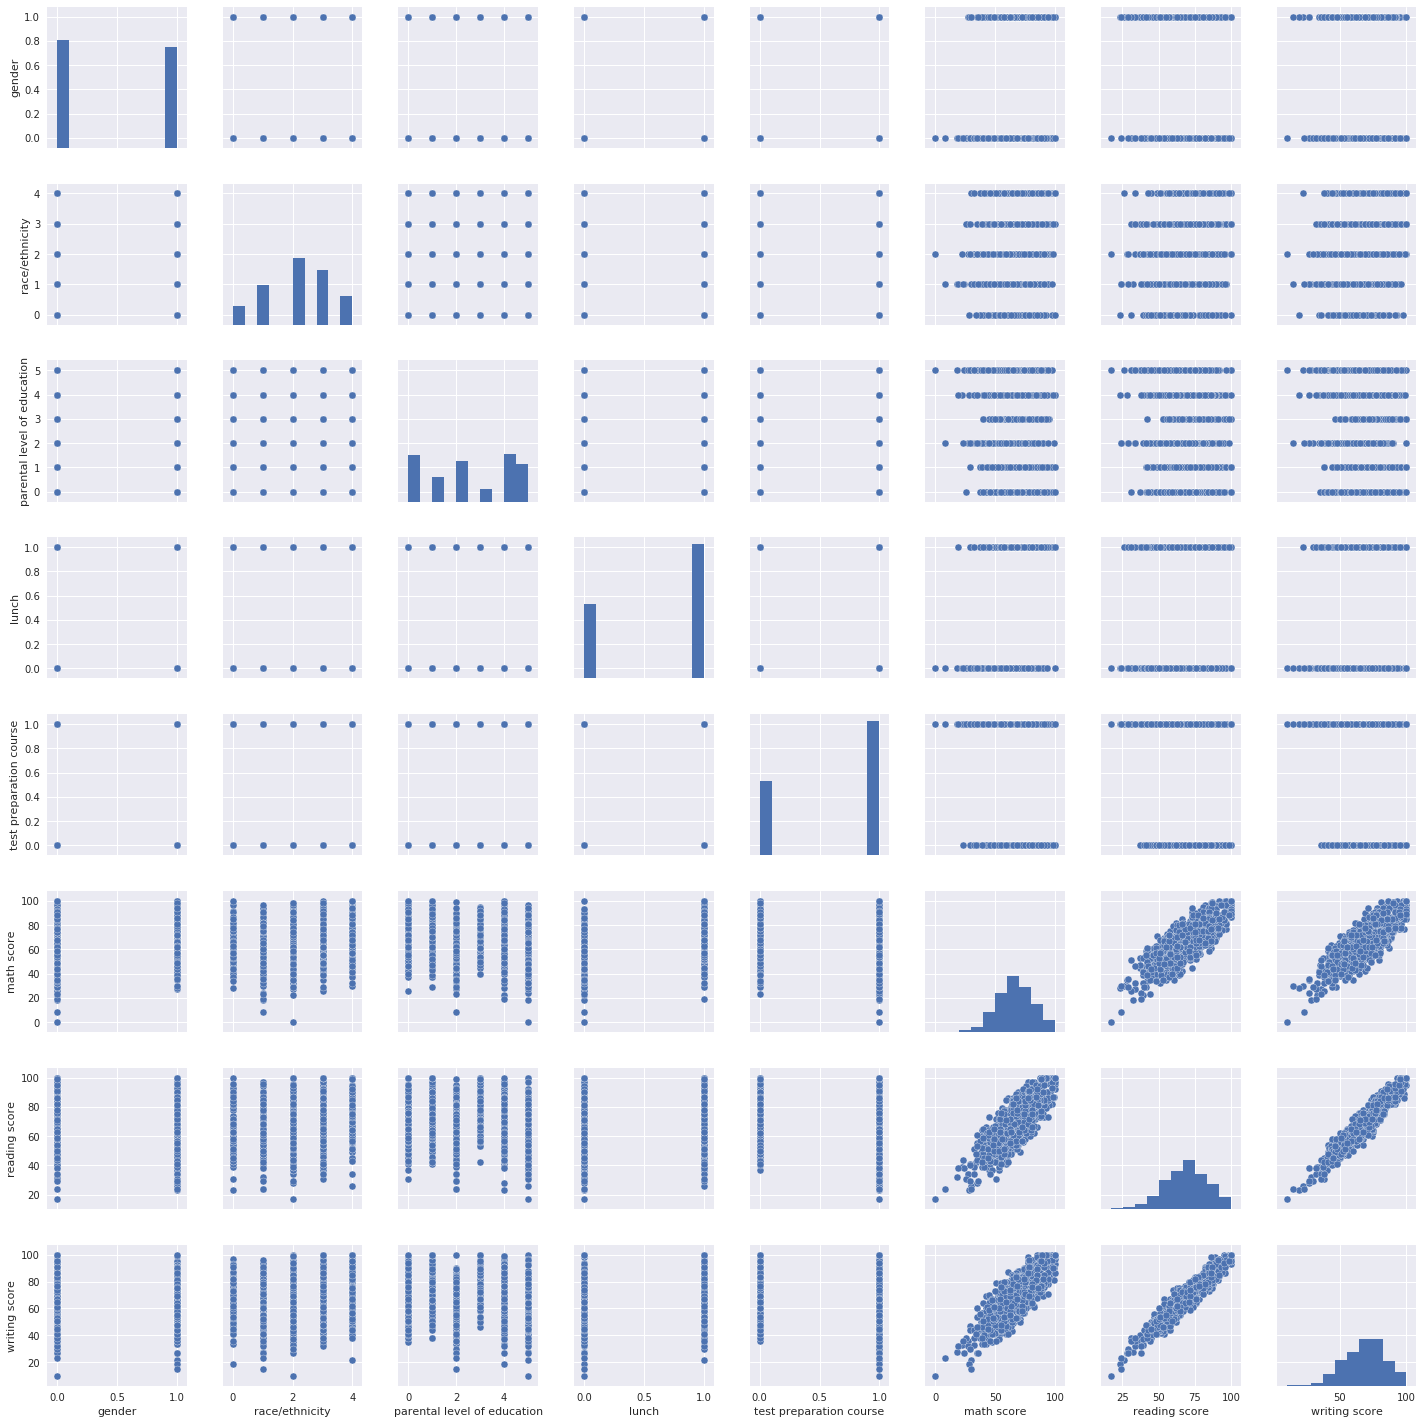

In [11]:
sns.pairplot(df.select_dtypes([np.int64, np.float64]))
#各科目の点数について強い正の相関があることがわかる
#最低点はいずれも女性が取っている
#グループによっても点数のとり方に規則性が見られる
#親の学力はMasterまで行ってる人は最低点が高い